Primero importamos las librerias a utilizar

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_validate
from IPython.display import clear_output
from sklearn.model_selection import cross_val_score

Ingestamos los datos para las variables df_test y df_train las cuales me serviran mas adelante para saber que modelo vamos a utilizar

In [2]:
df_test = pd.read_csv('datasets\\hospitalizaciones_test.csv', delimiter=',', encoding="utf-8")
df_train = pd.read_csv('datasets\\hospitalizaciones_train.csv', delimiter=',', encoding="utf-8")

Revisamos la informacion

In [187]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

In [188]:
df_train.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


Quitamos en este caso las variables que no nos sirven para el objetivo del proyecto

In [3]:
df_train.drop(['patientid','Visitors with Patient'], inplace=True, axis=1)


Creamos una variable que nos indique si el paciente tiene una estadia larga con un 1 o si no es larga con un 0

In [4]:
df_train["stay_long"] = np.where(df_train["Stay (in days)"]>8,1,0)

Se transforman las variables categoricas en enteros numericos para mejor manipulacion

In [5]:
E = preprocessing.LabelEncoder()

E.fit(df_train['Type of Admission'])
df_train['Type of Admission'] = E.transform(df_train['Type of Admission'])

E.fit(df_train['Severity of Illness'])
df_train['Severity of Illness'] = E.transform(df_train['Severity of Illness'])

E.fit(df_train.health_conditions)
df_train.health_conditions = E.transform(df_train.health_conditions)

E.fit(df_train.Insurance)
df_train.Insurance = E.transform(df_train.Insurance)

E.fit(df_train.Department)
df_train.Department = E.transform(df_train.Department)

E.fit(df_train.Ward_Facility_Code)
df_train.Ward_Facility_Code = E.transform(df_train.Ward_Facility_Code)

E.fit(df_train.doctor_name)
df_train.doctor_name = E.transform(df_train.doctor_name)

E.fit(df_train.Age)
df_train.Age = E.transform(df_train.Age)

E.fit(df_train.gender)
df_train.gender = E.transform(df_train.gender)

Observamos que ahora los datos categoricos son enteros numericos

In [6]:
df_train.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Admission_Deposit,Stay (in days),stay_long
0,4,2,3,8,0,4,0,1,0,1,1,2966.408696,8,0
1,4,2,1,8,2,3,0,1,1,2,0,3554.835677,9,1
2,2,2,1,8,8,2,0,1,0,1,1,5624.733654,7,0
3,4,2,3,4,7,3,0,2,2,4,0,4814.149231,8,0
4,2,1,4,2,10,7,1,1,2,1,0,5169.269637,34,1


Ahora el data set esta listo para poder empezar la creacion del modelo. Definimos X como todas las variables de nuestro data frame excepto la de larga estadia y nuestra Y como larga estadia.

In [7]:
X = df_train.iloc[:,0:12]
y = df_train.iloc[:,-1]

Utilizaremos el modelo de arbol de decisión y de regresion logistica dependiendo de cual se ajuste mejor. Se hace el split y luego se entrena el modelo. Partimos con el arbol de decision y luego se evaluara cual sirve mas para el proyecto





In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier(random_state=42, max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

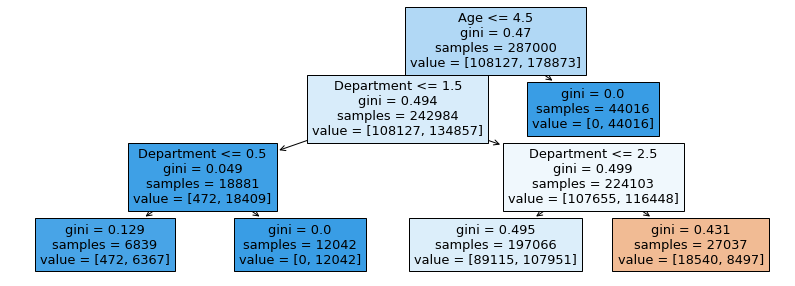

In [10]:
plt.figure(figsize=(14,5))
tree.plot_tree(decision_tree=model, feature_names=X_train.columns, filled=True)
plt.show()

Definimos como y_pred_train la prediccion del modelo

In [11]:
y_pred_train = model.predict(X)


Buscamos mediante CrossValidation cual es el nivel de profundidad optimo para nuestro arbol

Completado: 100.0%
Accuracy optimo: 0.66 (+/- 0.00)


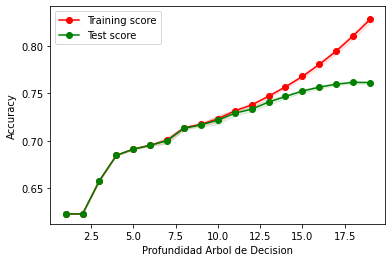

In [12]:

scoreoptimo = cross_val_score(model,X,y,cv = 9)
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,20,1)
i = 0
i_max = len(profundidades)
for profundidad in profundidades:
    i = i + 1
    clf = DecisionTreeClassifier(max_depth=profundidad)
    tree_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

print("Accuracy optimo: %0.2f (+/- %0.2f)" % (scoreoptimo.mean(), scoreoptimo.std() * 2))


plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")


plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()


La profundidad optima esta entre 4, 5 o 6

In [21]:
model = DecisionTreeClassifier(random_state=42, max_depth=4)
model.fit(X_train, y_train)
y_train_pred = model.predict(X)
y_train_pred

array([1, 1, 1, ..., 1, 1, 1])

In [22]:
recall_test = recall_score(y, y_train_pred)
print(recall_test)
accuracy_test = accuracy_score(y, y_train_pred)
print(accuracy_test)

0.9952587151940364
0.6846707317073171


In [23]:
model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(X_train, y_train)
y_train_pred = model.predict(X)
y_train_pred

array([1, 1, 0, ..., 1, 1, 1])

In [24]:
recall_test = recall_score(y, y_train_pred)
print(recall_test)
accuracy_test = accuracy_score(y, y_train_pred)
print(accuracy_test)

0.7339007736398659
0.6912195121951219


In [25]:
model = DecisionTreeClassifier(random_state=42, max_depth=6)
model.fit(X_train, y_train)
y_train_pred = model.predict(X)
y_train_pred

array([1, 1, 1, ..., 1, 1, 1])

In [26]:
recall_test = recall_score(y, y_train_pred)
print(recall_test)
accuracy_test = accuracy_score(y, y_train_pred)
print(accuracy_test)

0.956157797475491
0.6963975609756098


Nos quedamos con nivel de profundidad de 4

In [27]:
model = DecisionTreeClassifier(random_state=42, max_depth=4)
model.fit(X_train, y_train)
y_train_pred = model.predict(X)
y_train_pred

array([1, 1, 1, ..., 1, 1, 1])

In [28]:
recall_test = recall_score(y, y_train_pred)
print(recall_test)
accuracy_test = accuracy_score(y, y_train_pred)
print(accuracy_test)

0.9952587151940364
0.6846707317073171


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier(random_state=42, max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

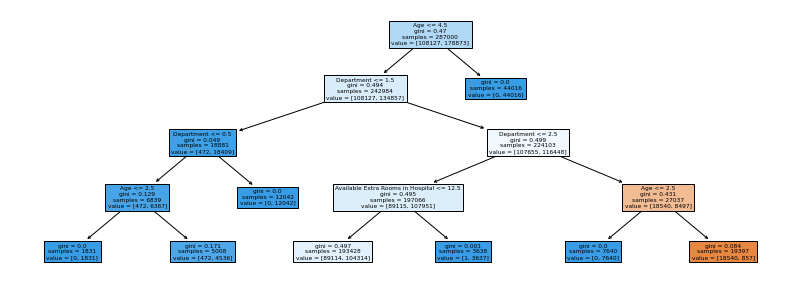

In [43]:
plt.figure(figsize=(14,5))
tree.plot_tree(decision_tree=model, feature_names=X_train.columns, filled=True)
plt.show()

Mediante el metodo de Chicuadrado eliminamos aquellas variables cuyo pvalues sean mayores a 0,05

In [17]:
f_score = chi2(X_train, y_train)
f_score

(array([1.67043623e+03, 2.04629953e+03, 1.59785609e+03, 8.36015030e+03,
        8.73632541e+00, 1.29007445e+04, 1.04664519e+04, 2.55403367e+00,
        3.84614306e+01, 1.00651245e+00, 2.70193683e-01, 1.98512045e+04]),
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.11932493e-03, 0.00000000e+00, 0.00000000e+00, 1.10013062e-01,
        5.58465259e-10, 3.15739801e-01, 6.03201877e-01, 0.00000000e+00]))

In [18]:
pvalues = pd.Series(f_score[1])
pvalues.index = X_train.columns
pvalues.sort_values(ascending=False)

Insurance                            6.032019e-01
health_conditions                    3.157398e-01
Type of Admission                    1.100131e-01
staff_available                      3.119325e-03
Severity of Illness                  5.584653e-10
Available Extra Rooms in Hospital    0.000000e+00
Department                           0.000000e+00
Ward_Facility_Code                   0.000000e+00
doctor_name                          0.000000e+00
Age                                  0.000000e+00
gender                               0.000000e+00
Admission_Deposit                    0.000000e+00
dtype: float64

En este caso son Insurance, health_conditions y Type of Admission por ende las eliminamos del modelo y vemos como queda

In [46]:
X = df_train[['staff_available','Severity of Illness','Available Extra Rooms in Hospital','Department','Ward_Facility_Code','doctor_name','Age','gender','Admission_Deposit']]
y = df_train.stay_long
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier(random_state=42, max_depth=4)
model.fit(X_train, y_train)
y_train_pred = model.predict(X)
y_train_pred

array([1, 1, 1, ..., 1, 1, 1])

In [47]:
recall_test = recall_score(y, y_train_pred)
print(recall_test)
accuracy_test = accuracy_score(y, y_train_pred)
print(accuracy_test)

0.9952587151940364
0.6846707317073171


Ahora mediante el metodo de pipelines probamos cual modelo se ajusta mejor si el de Arbol de decision o de regresion logistica

In [48]:
pipe_lr = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', LogisticRegression(random_state=42))])

pipe_dt = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', tree.DecisionTreeClassifier(random_state=42))])

In [49]:

pipelines = [pipe_lr, pipe_dt]
pipe_dict = {0: 'Regresión Logística', 1: 'Árbol de decisión'}

In [50]:
pipe_lr.fit(X_train, y_train)
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA(n_components=2)),
                ('clf', DecisionTreeClassifier(random_state=42))])

In [51]:
best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipelines):
	if val.score(X_train, y_train) > best_acc:
		best_acc = val.score(X_train, y_train)
		best_pipe = val
		best_clf = idx
print('Mejor accuracy: %s' % pipe_dict[best_clf])

Mejor accuracy: Árbol de decisión


Hacemos el pipline que nos permite testear el modelo

In [52]:
import joblib

joblib.dump(model, 'Modelo.pkl', compress=1)

['Modelo.pkl']

In [53]:

DecisionTree_model = joblib.load('Modelo.pkl')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
DecisionTree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [55]:
DecisionTree_model.score(X_test, y_test)

0.684219512195122

In [34]:
df_test = pd.read_csv('datasets\\hospitalizaciones_test.csv', delimiter=',', encoding="utf-8")
df_test = df_test.drop(columns=['patientid','Visitors with Patient'])

E = preprocessing.LabelEncoder()

E.fit(df_test['Type of Admission'])
df_test['Type of Admission'] = E.transform(df_test['Type of Admission'])

E.fit(df_test['Severity of Illness'])
df_test['Severity of Illness'] = E.transform(df_test['Severity of Illness'])

E.fit(df_test.health_conditions)
df_test.health_conditions = E.transform(df_test.health_conditions)

E.fit(df_test.Insurance)
df_test.Insurance = E.transform(df_test.Insurance)

E.fit(df_test.Department)
df_test.Department = E.transform(df_test.Department)

E.fit(df_test.Ward_Facility_Code)
df_test.Ward_Facility_Code = E.transform(df_test.Ward_Facility_Code)

E.fit(df_test.doctor_name)
df_test.doctor_name = E.transform(df_test.doctor_name)

E.fit(df_test.Age)
df_test.Age = E.transform(df_test.Age)

E.fit(df_test.gender)
df_test.gender = E.transform(df_test.gender)

DecisionTree_model = joblib.load('Modelo.pkl')
X_test = df_test[['staff_available','Severity of Illness','Available Extra Rooms in Hospital','Department','Ward_Facility_Code','doctor_name','Age','gender','Admission_Deposit']]
pred = DecisionTree_model.predict(X_test)
df_test['pred'] = pred
df_test = df_test['pred']
df_test.to_csv('Prediccion.csv', index=False)